In [2]:
from typing import Dict, Union, List
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
SEMESTER_WEEKS: int = 16
MONTHLY_INCOME: int = 400000

In [4]:
environment: Dict[str, Union[int, float, bool, str]] = {
    "week_days": 5,
    "buy_lunch": True,
    "lunches_per_week": 3,
    "buy_snack": True,
    "snack_proability": 0.5,
    "snack_range": (6000, 15000),
    "transport_fares_per_day": 2,
    "extra_expenses_probability": 0.4,
    "extra_expenses_range": (50000, 80000)
}

prices: Dict[str, float] = {
    "lunch": 16500,
    "snack": 7000,
    "transport_fare": 3400
}

In [5]:
weekly_base_expenses: float = 0

In [6]:
if environment['buy_lunch']:
    weekly_base_expenses += environment['lunches_per_week'] * prices['lunch']

weekly_base_expenses += environment['transport_fares_per_day'] * prices['transport_fare'] * environment['week_days']

In [7]:
weekly_extra_expenses: List[float] = []

for _ in range(SEMESTER_WEEKS):
    value_to_add: float = 0

    if random.random() < environment['extra_expenses_probability']:
        extra = random.uniform(*environment['extra_expenses_range'])
        weekly_extra_expenses.append(extra)
        continue

    weekly_extra_expenses.append(0)

In [8]:
weeks = np.arange(SEMESTER_WEEKS + 1)
cumulative_income = np.zeros(SEMESTER_WEEKS + 1)
cumulative_expenses = np.zeros(SEMESTER_WEEKS + 1)

for month in range(int(SEMESTER_WEEKS / 4)):
    week_index = month * 4

    if week_index <= SEMESTER_WEEKS:
        cumulative_income[week_index:] += MONTHLY_INCOME

for week in range(1, SEMESTER_WEEKS + 1):
    cumulative_expenses[week] = cumulative_expenses[week - 1] + \
        weekly_base_expenses + weekly_extra_expenses[week - 1]


if environment['buy_snack']:
    for week in range(len(cumulative_expenses)):
        for day in range(environment['week_days']):
            if random.random() < environment['snack_proability']:
                extra = random.uniform(*environment['snack_range'])
                cumulative_expenses[week] += extra

available_balance = cumulative_income - cumulative_expenses

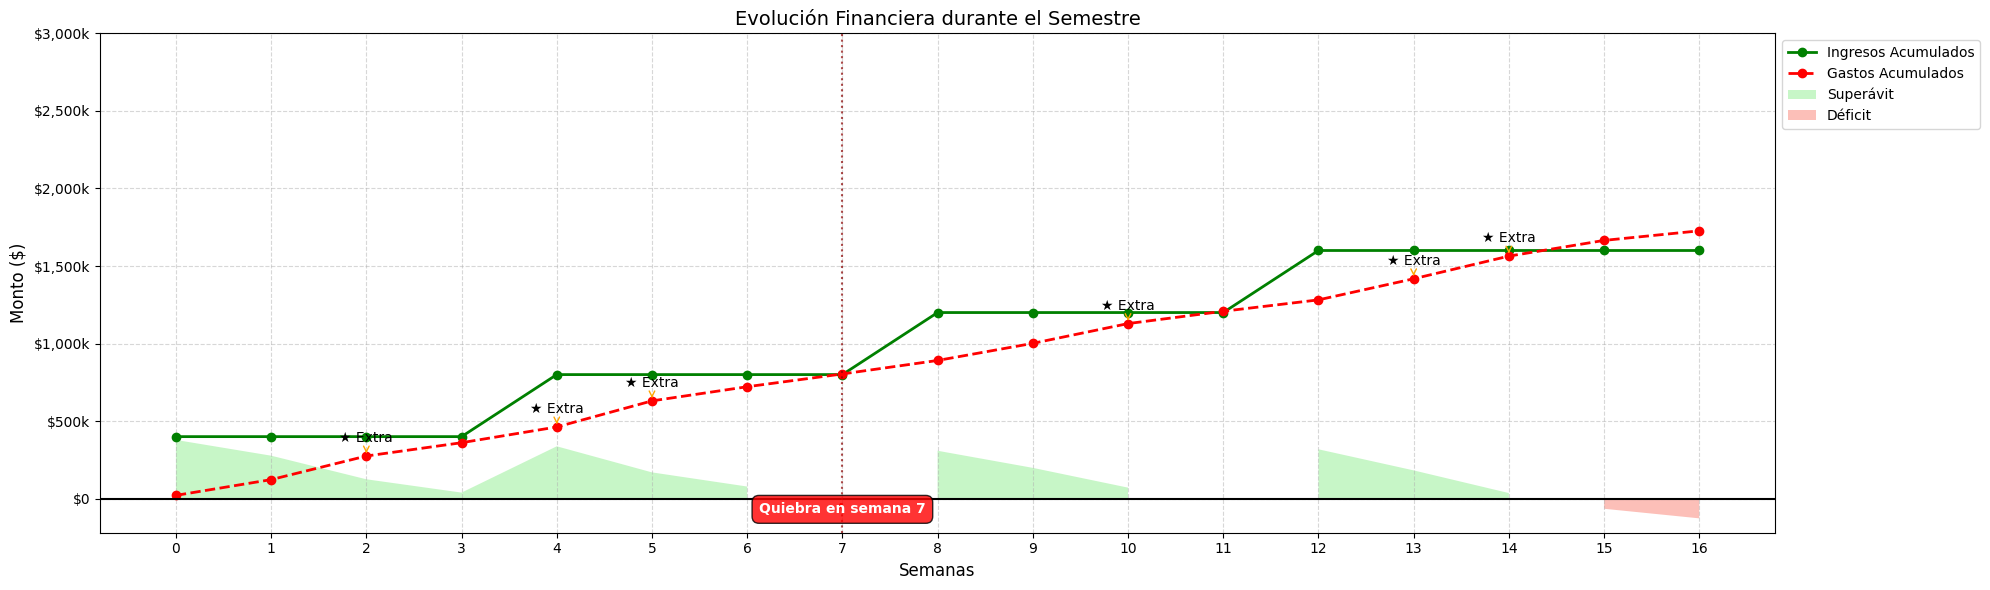

In [12]:
plt.figure(figsize=(20, 6))

plt.plot(weeks, cumulative_income, 'g-o',
         label='Ingresos Acumulados', linewidth=2)
plt.plot(weeks, cumulative_expenses, 'r--o',
         label='Gastos Acumulados', linewidth=2)

plt.fill_between(weeks, available_balance, where=(available_balance >= 0),
                 facecolor='lightgreen', alpha=0.5, label='Superávit')

plt.axhline(0, color='black', linestyle='-', linewidth=1.5)

plt.fill_between(weeks, available_balance, where=(available_balance < 0),
                 facecolor='salmon', alpha=0.5, label='Déficit')


extra_weeks = [i + 1 for i, val in enumerate(weekly_extra_expenses) if val > 0]
for week in extra_weeks:
    plt.annotate('★ Extra', (week, cumulative_expenses[week]),
                 textcoords="offset points", xytext=(0, 10), ha='center',
                 arrowprops=dict(arrowstyle="->", color='orange'))

plt.title('Evolución Financiera durante el Semestre', fontsize=14)
plt.xlabel('Semanas', fontsize=12)
plt.ylabel('Monto ($)', fontsize=12)
plt.xticks(range(0, SEMESTER_WEEKS + 1))

y_min = min(available_balance)
y_max = max(cumulative_income) + 1_000_000
step = 500_000

if y_min < 0 < y_max:
    y_ticks = np.arange(round(y_min/step)*step, y_max + step, step)
else:
    y_ticks = np.arange(round(y_min/step)*step, y_max + step, step)

plt.yticks(y_ticks,
           labels=[f"${abs(x)/1000:,.0f}k" if x != 0 else "$0"
                   for x in y_ticks],
           fontsize=10)

bankruptcy_week = np.argmax(available_balance < 0)
if bankruptcy_week > 0:
    plt.axvline(x=bankruptcy_week, color='darkred', linestyle=':', alpha=0.7)

    plt.annotate(f'Quiebra en semana {bankruptcy_week}',
                 (bankruptcy_week, 0),
                 xytext=(bankruptcy_week, -max(abs(available_balance))/4),
                 bbox=dict(boxstyle="round,pad=0.5", fc="red",
                           ec="black", lw=1, alpha=0.8),
                 color='white',
                 fontweight='bold',
                 ha='center',
                 arrowprops=dict(arrowstyle="->",
                                 color='red',
                                 linewidth=2,
                                 connectionstyle="arc3,rad=-0.2"))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()